# Communities within Sport, Gesundheit and Lifestyle Topic of derStandard

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import networkx as nx
from utils import *

In [2]:
%load_ext autoreload
%autoreload 2

## Load Data, filter and build graph

In [3]:
df = load_data()
df['ArticleChannel'].value_counts()

ArticleChannel
Inland           188069
Panorama          98391
Meinung           96008
Web               59589
International     55911
Wirtschaft        50755
Sport             40396
Etat              34890
Kultur            24013
User              12760
Wissenschaft      12565
Lifestyle         11124
Gesundheit        10490
Bildung            7942
dieStandard        7527
AutoMobil          6366
Immobilien         5071
Diverses           4597
Zukunft            4228
Reisen             3285
Familie            2658
Karriere           2459
Name: count, dtype: int64

In [4]:
# select categories to analyze
channels = ['Gesundheit', 'Sport', 'Lifestyle']

filtered_df, articles_per_user, selected_users = filter_users(df, channels, min_articles=5)
print(f"Number of selected users: {len(selected_users)}")

Number of selected users: 1432


In [5]:
# create graph
weights = iom(selected_users, articles_per_user)
threshold = np.percentile(weights.flatten(), 95)
graph = build_graph(selected_users, weights, 0.2)

  1%|          | 9/1432 [00:00<00:17, 82.58it/s]

100%|██████████| 1432/1432 [00:05<00:00, 239.91it/s]


In [6]:
# print distribution of comments in the selected categories
category_comments_percentage = filtered_df['ArticleChannel'].value_counts().div(len(filtered_df))
print(category_comments_percentage)

ArticleChannel
Sport         0.750755
Lifestyle     0.133838
Gesundheit    0.115407
Name: count, dtype: float64


## Greedy Modularity

In [8]:
communities = nx.community.modularity_max.greedy_modularity_communities(graph, 'weight')
print(f"Number of communities: {len(communities)}")
print(f" Sizes of the communities: {[len(c) for c in communities]}")

Number of communities: 4
 Sizes of the communities: [524, 510, 381, 17]


In [9]:
# generate dataframe with number of comments (or a weighted variant, if normalized) per category for each community
community_comments_df = comments_in_category_per_community(communities,
                                                           filtered_df,
                                                           percentage=True,
                                                           weight_by_category_distribution=False)
community_comments_df.head(5)

,Sport,Gesundheit,Lifestyle
0,0.947098,0.018519,0.034384
1,0.870919,0.053957,0.075125
2,0.143181,0.418668,0.438151
3,0.965517,0.011494,0.022989


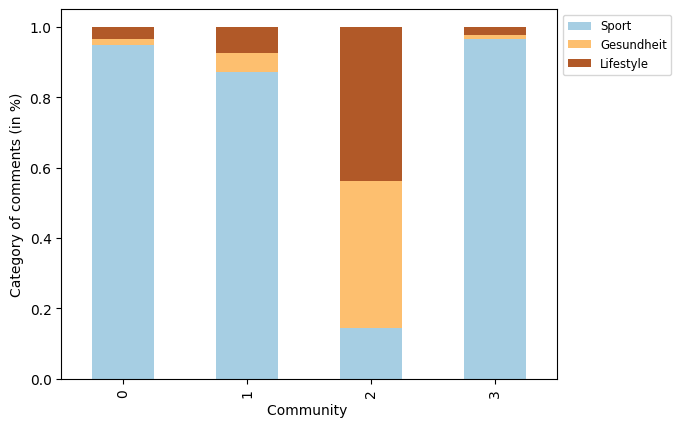

In [10]:
# plot and save results
plot = community_comments_df.plot(kind='bar',
                                  stacked=True,
                                  colormap='Paired',
                                  xlabel='Community ',
                                  ylabel='Category of comments (in %)').legend(bbox_to_anchor=(1.0, 1.0), fontsize='small')

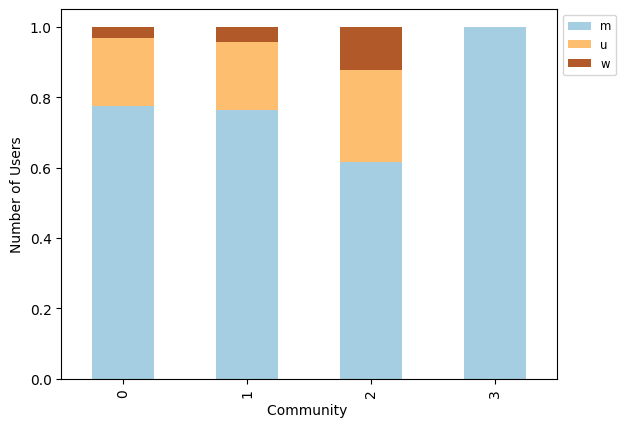

In [11]:
plot_gender_per_community(communities, filtered_df)

<Axes: xlabel='UserGender'>

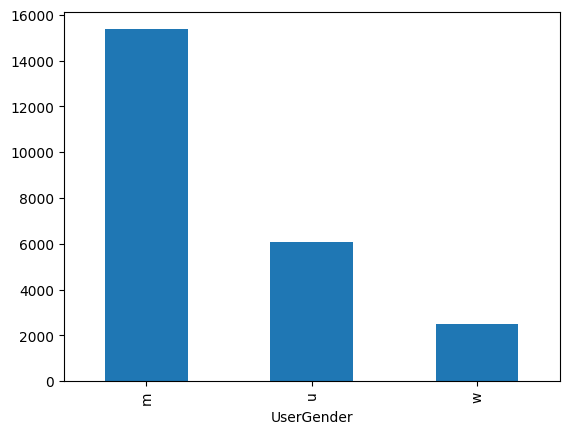

In [ ]:
x = df[['ID_CommunityIdentity', 'UserGender']].drop_duplicates()
x['UserGender'].fillna('u', inplace=True)
x.groupby('UserGender').size().plot(kind='bar')


## Louvain community

In [12]:
communities = nx.community.louvain_communities(graph, weight='weight')
communities = list(communities)
print(f"Number of communities: {len(communities)}")
print(f"Sizes of the communities: {[len(c) for c in communities]}")

Number of communities: 6
Sizes of the communities: [286, 228, 473, 19, 381, 45]


In [13]:
# generate dataframe with number of comments (or a weighted variant, if normalized) per category for each community
community_comments_df = comments_in_category_per_community(communities,
                                                           filtered_df,
                                                           percentage=True,
                                                           weight_by_category_distribution=False)
community_comments_df.head(5)

,Sport,Gesundheit,Lifestyle
0,0.933490,0.026276,0.040235
1,0.928224,0.028271,0.043506
2,0.228909,0.371560,0.399531
3,0.964286,0.010989,0.024725
4,0.945844,0.019072,0.035084


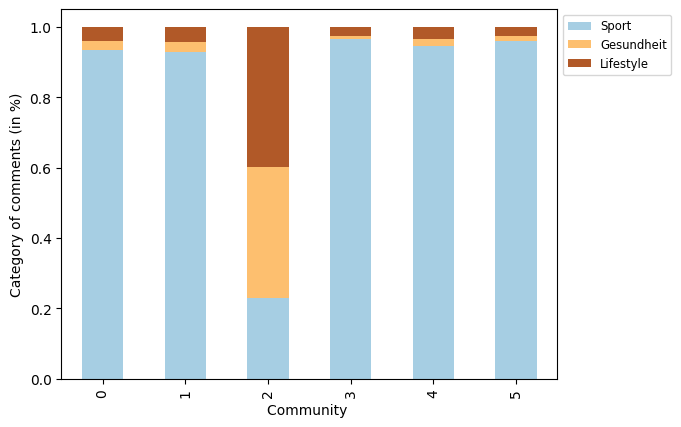

In [14]:
# plot and save results
plot = community_comments_df.plot(kind='bar',
                                  stacked=True,
                                  colormap='Paired',
                                  xlabel='Community ',
                                  ylabel='Category of comments (in %)').legend(bbox_to_anchor=(1.0, 1.0), fontsize='small')

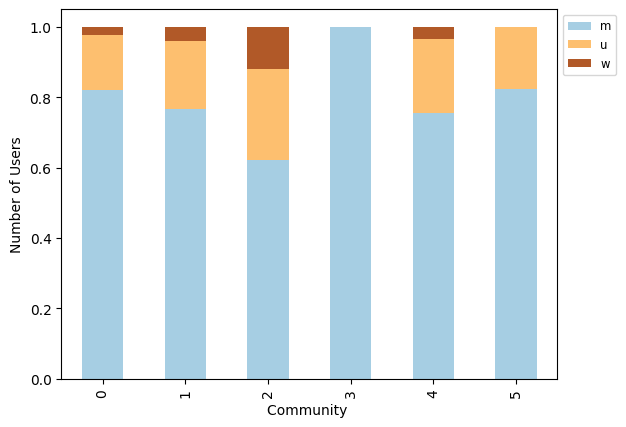

In [15]:
plot_gender_per_community(communities, filtered_df)